---

Images: https://unsplash.com/

The purpose of this task is to use different supervised machine learning methods(user gives input, machine predicts output, that is why it is called supervised machine learning) to classify color images and compare performances of these classifiers. This is done by transforming data to appropriate format, extracting useful features from data and then using those features as input for different machine learning classifiers and comparing their output.

Data used for this task is composed from three text files that include image URLs. Each file has images about different topics that are grass, sand and stairs. Images are in RGB (red-green-blue) format, meaning that color of each pixel in an image is a combination of different strengths of red, green and blue. Data is downloaded from website unsplash.com, which copyright license states that "Unsplash grants you an irrevocable, nonexclusive, worldwide copyright license to download, copy, modify, distribute, perform, and use photos from Unsplash for free, including for commercial purposes, without permission from or attributing the photographer or Unsplash. This license does not include the right to compile photos from Unsplash to replicate a similar or competing service."

Methods used in this task include preparing data using e.g. scikit-image library, extraction of RGB channels' means and variances from images, using gray-level co-occurrence matrix to measure texture, Principal component analysis for finding principal components, K-nearest neighbours algorithm for classifying images, Ridge regression for classifying images and Multilayer perceptron for classifying images.

## Data preparation

In [1]:
#Importing all the needed packages
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, img_as_ubyte
from skimage.transform import resize
from skimage.color import rgb2gray
from scipy.stats import pearsonr
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import RidgeClassifier
from skimage.feature.texture import greycomatrix, greycoprops
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn.neural_network import MLPClassifier

In [2]:
#code for reading the URLS from text files and importing the images
urls_grass=np.loadtxt('grass.txt', dtype='U150')
urls_sand=np.loadtxt('sand.txt', dtype='U150')
urls_stairs=np.loadtxt('stairs.txt', dtype='U150')
images=[]
for i in range(len(urls_grass)):
    url=urls_grass[i]
    img=io.imread(url)
    images.append(img)
for i in range(len(urls_sand)):
    url=urls_sand[i]
    img=io.imread(url)
    images.append(img)
for i in range(len(urls_stairs)):
    url=urls_stairs[i]
    img=io.imread(url)
    images.append(img)

In [3]:
for i in range(len(images)): #Cropping all images to size(465, 1000)
    if images[i].shape[0]>465:
        pixels=int((images[i].shape[0]-465)/2)
        k=0
        while k<pixels:
            images[i]=np.delete(images[i], (images[i].shape[0]-1), axis=0)
            images[i]=np.delete(images[i], (0), axis=0)
            k += 1
    if images[i].shape[0]>465: #deleting the even pixel if necessary
        images[i]=np.delete(images[i], (0), axis=0)

In [4]:
#code for label array for upcoming classifications
labels=[]
for i in range(len(urls_grass)):
    label="grass"
    labels.append(label)
for i in range(len(urls_sand)):
    label="sand"
    labels.append(label)
for i in range(len(urls_stairs)):
    label="stairs"
    labels.append(label)

In [5]:
#code for changing images to grayscale
gs_images=[]
for i in range(len(images)):
    img=rgb2gray(images[i])
    gs_images.append(img)

In [6]:
#code for changing images' quantization level to 8, meaning that pixels only have eight different color options
gsq_images=[]
for i in range(len(gs_images)):
    img_q=gs_images[i]
    img_q=img_as_ubyte(img_q) #turns pixel values between 0 and 255
    for j in range(len(img_q)):
        img_q[j]=img_q[j]/32 #turns pixel values between 0 and 7
    gsq_images.append(img_q)

C:\Users\Kalle Henriksson\Anaconda3\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Kalle Henriksson\Anaconda3\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Kalle Henriksson\Anaconda3\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Kalle Henriksson\Anaconda3\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Kalle Henriksson\Anaconda3\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Kalle Henriksson\Anac

C:\Users\Kalle Henriksson\Anaconda3\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Kalle Henriksson\Anaconda3\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Kalle Henriksson\Anaconda3\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Kalle Henriksson\Anaconda3\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Kalle Henriksson\Anaconda3\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Kalle Henriksson\Anac

C:\Users\Kalle Henriksson\Anaconda3\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Kalle Henriksson\Anaconda3\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Kalle Henriksson\Anaconda3\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Kalle Henriksson\Anaconda3\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Kalle Henriksson\Anaconda3\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Kalle Henriksson\Anac

C:\Users\Kalle Henriksson\Anaconda3\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Kalle Henriksson\Anaconda3\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Kalle Henriksson\Anaconda3\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Kalle Henriksson\Anaconda3\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Kalle Henriksson\Anaconda3\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Kalle Henriksson\Anac

So now we have pictures in two arrays. Variable "images" include RGB images turned to same size and "gsq_images" include grayscaled images with quantization level 8, also in same size. Variable "labels" include data labels for both variables containing images.

## Feature extraction

In [7]:
#Means and variances for red channel
R_means=[]
R_variances=[]
for i in range(len(images)): #calculating one image at a time
    img=images[i]
    R_values=[] #color channel values to empty list
    for j in range(img.shape[0]):
        for k in range(img.shape[1]):
            R_values.append(img[j][k][0])
    R_means.append(np.mean(R_values)) #feature values stored to a list
    R_variances.append(np.var(R_values))
print(R_means)
print(R_variances)

[62.892817204301075, 119.35806451612903, 24.94718924731183, 101.57464731182796, 110.45785161290323, 84.5354, 102.4062, 120.65575913978495, 89.90124731182796, 59.64278279569893, 79.35888387096774, 99.28626451612904, 99.7391376344086, 55.98053978494624, 147.68464516129032, 133.4117075268817, 46.51485376344086, 77.1649870967742, 97.33112043010753, 132.5531741935484, 120.35436559139785, 65.88833548387096, 41.33163870967742, 24.37191182795699, 96.72602580645162, 89.50092258064517, 89.87833548387097, 87.47286451612904, 8.537081720430107, 119.73709462365592, 151.21711182795698, 80.59528602150537, 50.4103440860215, 143.04776989247313, 126.17559139784946, 157.48020860215053, 55.258967741935486, 92.55678709677419, 81.18949677419354, 129.08980215053762, 145.9644559139785, 85.11580215053763, 91.01509462365591, 148.17919784946235, 73.65546666666667, 97.81763440860215, 103.64775268817205, 87.78883225806452, 126.31596129032258, 72.44375913978494, 149.41071612903227, 124.26656344086021, 102.7655311827

In [8]:
#Means and variances for green channel, same way as earlier
G_means=[]
G_variances=[]
for i in range(len(images)):
    img=images[i]
    G_values=[]
    for j in range(img.shape[0]):
        for k in range(img.shape[1]):
            G_values.append(img[j][k][1])
    G_means.append(np.mean(G_values))
    G_variances.append(np.var(G_values))
print(G_means)
print(G_variances)

[99.6910494623656, 137.99012258064516, 90.92263870967741, 118.81209247311828, 154.90865376344087, 92.28051397849462, 145.3775053763441, 110.45251612903226, 106.62652688172042, 182.21756774193548, 125.35383010752687, 147.03648172043012, 147.6439870967742, 91.01774623655913, 161.6907182795699, 169.82507526881722, 126.41367096774194, 90.69209032258064, 134.03307311827956, 139.84217849462365, 166.68744731182795, 142.20802150537634, 104.32761505376344, 39.24544946236559, 126.48263010752689, 120.70894193548386, 124.78373333333333, 96.81749247311828, 48.24018494623656, 167.0855247311828, 167.49882795698926, 115.34005376344086, 63.93511397849463, 153.87810107526883, 121.76058494623656, 160.6446301075269, 69.83901075268817, 83.83417849462366, 109.88636344086021, 144.4662494623656, 121.65699139784947, 112.85124086021506, 96.8397182795699, 143.42975268817204, 77.10258924731183, 100.72850537634409, 110.10535698924731, 97.63455913978494, 113.04017204301076, 107.51908817204301, 152.52343655913978, 1

In [9]:
#Means and variances for blue channel, same way as earlier
B_means=[]
B_variances=[]
for i in range(len(images)):
    img=images[i]
    B_values=[]
    for j in range(img.shape[0]):
        for k in range(img.shape[1]):
            B_values.append(img[j][k][2])
    B_means.append(np.mean(B_values))
    B_variances.append(np.var(B_values))
print(B_means)
print(B_variances)

[23.996427956989248, 116.80033333333333, 13.387862365591397, 20.441432258064516, 35.436124731182794, 47.95347956989247, 123.30712903225806, 31.09580430107527, 41.06562365591398, 36.52773548387097, 51.73248602150537, 44.77704946236559, 66.02440860215054, 62.17660215053763, 81.47663655913979, 63.19449247311828, 72.99653118279569, 43.80080645161291, 36.5338, 124.27256989247311, 78.86337634408602, 41.835367741935485, 17.691152688172043, 9.480909677419355, 76.33427526881721, 61.54805161290322, 36.508991397849464, 52.414834408602154, 14.334548387096774, 35.108789247311826, 69.32439139784947, 21.484221505376343, 18.705591397849464, 43.35982365591398, 78.19496774193549, 139.75977634408602, 44.76924301075269, 51.50486021505376, 26.391569892473118, 111.22663870967742, 81.33754623655913, 53.434922580645164, 36.37087956989247, 102.82852043010753, 49.51301720430108, 15.709909677419354, 82.51364946236559, 56.47836989247312, 69.05255268817204, 42.01187956989247, 110.75477849462365, 119.86707741935484

### Second order texture measure

Gray-level Co-Occurrence Matrix (GLCM) is used as a method for measuring image's texture. It builds a matrix from image's pixel values where information can be found about how often different brightness value combinations occur in an image.

In [10]:
glcm_right_correlations=[] #code for calculating glcm matrixes and correlations one pixel right and one pixel up
glcm_up_correlations=[]
for i in range(len(gsq_images)):
    img=gsq_images[i]
    glcm = greycomatrix(img, [1], [0, np.pi/2], levels=8)
    glcm_c= greycomatrix(img, [1], [0, np.pi/2], levels=8, normed=True, symmetric=True)
    correlation = greycoprops(glcm_c, 'correlation')
    print("Image " + str(i) + " GLCM to the right:")
    print(glcm[:, :, 0, 0])
    print("Image " + str(i) + " GLCM upwards:")
    print(glcm[:, :, 0, 1])
    glcm_right_correlations.append(correlation[0][0])
    glcm_up_correlations.append(correlation[0][1])

Image 0 GLCM to the right:
[[ 7670 10974  3169   535    66     3     0     0]
 [10854 52266 36661  9012  1216   107     5     1]
 [ 3286 36228 72009 36457  7497   922    64     0]
 [  589  9130 35889 44754 18272  3020   247    10]
 [   63  1431  7703 17984 16620  4833   511    21]
 [    6   131   905  2933  4950  3154   575    33]
 [    0     2    64   207   509   619   248    26]
 [    0     0     2     4    31    29    25     3]]
Image 0 GLCM upwards:
[[ 7545 10450  3499   772   120     9     0     0]
 [10980 50225 36039 10506  2068   215     7     0]
 [ 3184 37387 68917 36183  9216  1323    93     2]
 [  635 10087 37516 42068 17678  3442   307    12]
 [   92  1676  9004 18487 14724  4528   548    30]
 [    3   194  1213  3408  4689  2615   505    34]
 [    0     8    75   292   576   519   190    11]
 [    0     0     1    10    21    32    25     5]]
Image 1 GLCM to the right:
[[ 9820  3269    27     8     2     0     0     0]
 [ 3298 43814  6765   390    79    17     1     0]
 [  

Image 13 GLCM to the right:
[[59538 21503  3352   537    80     3     0     0]
 [21542 60644 24510  5164   862   111     2     0]
 [ 3320 24111 42784 20684  4452   712    63     0]
 [  554  5472 20182 34276 14910  2646   260    11]
 [   85   961  4538 14663 24063  8564  1026    40]
 [    1   113   710  2670  8592 13812  3095   115]
 [    0     3    58   309   939  3130  3835   306]
 [    0     0     1     2    42   128   299   150]]
Image 13 GLCM upwards:
[[53012 23037  6681  1860   385    34     0     0]
 [23528 50237 24912 10160  3194   653    49     0]
 [ 6248 25719 32276 20040  8607  2704   362     5]
 [ 1901 10032 20665 24479 14473  5431  1134    66]
 [  378  3072  8498 14921 16331  8360  2118   151]
 [   39   623  2597  5468  8529  8808  2820   201]
 [    0    38   331  1140  2124  2862  1920   165]
 [    0     0     9    55   163   194   167    34]]
Image 14 GLCM to the right:
[[  1172    476     71      6      0      0      0      0]
 [   471   7928   1261    181      9      0 

Image 27 GLCM to the right:
[[36357 14509  2338   543    90     4     0     0]
 [14185 68725 23272  7424  2211   371     9     0]
 [ 2549 22872 40803 19464  7617  2105   231     6]
 [  583  7601 19471 27724 14997  5260   877    35]
 [   73  2158  7521 15091 22655 11774  2126   133]
 [    7   343  2054  5315 11771 20572  5401   204]
 [    0    19   231   955  2093  5363  5250   293]
 [    0     0     4    41    98   218   310   229]]
Image 27 GLCM upwards:
[[43136  9790   538    80    16     4     0     0]
 [10265 87799 15981  1663   284    58    16     0]
 [  435 16879 61330 14990  1617   264    57     8]
 [   60  1466 15876 45722 12190  1015   151    29]
 [   12   240  1486 12748 38021  8504   428    76]
 [    1    40   217   986  8787 31591  3926   115]
 [    0     4    44   145   414  3981  9243   372]
 [    0     0     4    22    66   133   375   300]]
Image 28 GLCM to the right:
[[230303   6478    282    153     42      1      0      0]
 [  6259 111189   7274    443    172     12 

Image 41 GLCM to the right:
[[ 5674  6063  1419   153     8     0     0     0]
 [ 6061 42120 24435  5573   654    11     0     0]
 [ 1380 24619 61621 29070  6437   395     3     0]
 [  169  5446 29312 51535 23727  3019    77     0]
 [    4   627  6432 23847 41690 12815   639     2]
 [    0     6   396  3032 12898 22049  3356    56]
 [    0     0     2    69   582  3441  3212   151]
 [    0     0     0     2     3    37   167    39]]
Image 41 GLCM upwards:
[[ 9043  3962   192     7     0     0     0     0]
 [ 4106 58525 15309   572    16     0     0     0]
 [  178 15898 87940 18785   603     7     0     0]
 [    6   581 19540 77418 15472   281     1     0]
 [    0    24   677 16247 60837  8232    44     0]
 [    0     0    12   246  8763 30752  2016     3]
 [    0     0     0     0    33  2105  5212   107]
 [    0     0     0     0     0     0   110   138]]
Image 42 GLCM to the right:
[[34287 14251  1836   299    29     0     0     0]
 [14325 67876 26544  3477   540    59     6     0]
 

Image 56 GLCM to the right:
[[45712  5143   682   192    41     7     0     0]
 [ 5119 35698  6512  1243   304    73     6     2]
 [  667  6346 39036 10660  1893   324    50     2]
 [  193  1267 10441 69070 13983  1707   225    14]
 [   44   292  1906 13781 85458 12026   900    42]
 [    8    76   342  1761 11879 50905  4274   167]
 [    0    19    51   222   924  4242 13271   594]
 [    0     3     6    14    42   152   604  3918]]
Image 56 GLCM upwards:
[[46699  4802   260    41     9     3     0     0]
 [ 4187 37148  6675   735   114    25     2     0]
 [  249  5964 41010 10401  1095   116    17     0]
 [   27   681  9952 71395 13618   967    80     6]
 [    3   101  1030 13457 87826 11323   480    16]
 [    1    11   108   925 11434 52497  4337   104]
 [    0     1     4    63   448  4443 13660   711]
 [    0     0     0     1    10    72   754  3902]]
Image 57 GLCM to the right:
[[86873 16623   976   182    19     0     0     0]
 [15252 97661 20451  2427   449    61     1     0]
 

Image 68 GLCM to the right:
[[     0      0      0      0      0      0      0      0]
 [     0   7542    309     12      0      0      0      0]
 [     0    268  53662   3816     63      1      0      0]
 [     0     13   3801 151672   9975      8      0      0]
 [     0      1     76  10261  76669   1110      0      0]
 [     0      0      0     10   1315 133820    327      0]
 [     0      0      0      0      1    326   9477      0]
 [     0      0      0      0      0      0      0      0]]
Image 68 GLCM upwards:
[[     0      0      0      0      0      0      0      0]
 [     0   7547    301     12      1      0      0      0]
 [     0    306  53471   3891    115      0      0      0]
 [     0     10   4004 149973  11125     17      0      0]
 [     0      0    118  11884  74758   1171      0      0]
 [     0      0      0     16   2171 132859    446      0]
 [     0      0      0      0      1    660   9143      0]
 [     0      0      0      0      0      0      0      0]]
Ima

Image 80 GLCM to the right:
[[    40     51     20      7      2      0      0      0]
 [    51    890    667    309     92     15      0      0]
 [    16    663   4424   3372   1263    298     19      0]
 [    11    314   3371  20034  12223   3299    378     13]
 [     2     91   1273  12227  59677  29793   3832    132]
 [     0     14    282   3343  29681 111914  29763    986]
 [     0      1     21    361   3972  29618  80523   4124]
 [     0      0      0      9    111   1004   4130   5809]]
Image 80 GLCM upwards:
[[    34     51     24      5      6      0      0      0]
 [    65    902    633    297    106     17      2      0]
 [    14    749   4487   3213   1236    302     28      1]
 [     6    246   3434  20279  11809   3425    344     12]
 [     1     67   1213  12272  59766  29579   3768    121]
 [     0      9    244   3199  29914 111768  29936    856]
 [     0      0     18    362   3967  29510  79973   4667]
 [     0      0      0     16    148   1088   4414   5397]]
Ima

Image 94 GLCM to the right:
[[ 28499   1099     14      1      0      0      0      0]
 [  1125  46223   3909     61      3      0      0      0]
 [    14   3850  78163   6428     75      8      0      0]
 [     5     54   6428  71090   6308     56      1      1]
 [     0     17     90   6246  65747   3082      6      1]
 [     0      2      7     59   3001 117861    621      3]
 [     0      0      0      5      4    619  13733      3]
 [     0      0      0      1      1      3      3      5]]
Image 94 GLCM upwards:
[[ 26426   2527    439    221     25      2      0      0]
 [  2324  37955   8762   1753    512     57      0      0]
 [   682   8293  63480  14139   1802    151     10      1]
 [   208   1989  13928  54121  12892    600     36      2]
 [    20    573   1824  12889  54216   5362     91      6]
 [     2     48    254    803   5543 113350   1431      3]
 [     0      4     15     46    157   1218  12794      1]
 [     0      0      2      4      3      2      2      0]]
Ima

Image 110 GLCM to the right:
[[     9     22      1      0      0      0      0      0]
 [    22 136249   8542     72      0      0      0      0]
 [     0   8479  66944  11328    168      2      0      0]
 [     0    165  11189  72193  13067     65      1      0]
 [     0      4    243  12986  80329   8256      6      0]
 [     0      0      1     74   8248  25781     39      0]
 [     0      0      0      0      5     41      4      0]
 [     0      0      0      0      0      0      0      0]]
Image 110 GLCM upwards:
[[     8     23      1      0      0      0      0      0]
 [    24 135928   8444    284     13      0      0      0]
 [     0   8725  66505  11328    335      6      0      0]
 [     0    132  11715  71109  13446     97      1      0]
 [     0      3    203  13746  79277   8486      0      0]
 [     0      0      0     72   8568  25428     43      0]
 [     0      0      0      0      3     41      6      0]
 [     0      0      0      0      0      0      0      0]]
I

Image 124 GLCM to the right:
[[     0      0      0      0      0      0      0      0]
 [     0      0      0      0      0      0      0      0]
 [     0      0    275     56      0      0      0      0]
 [     0      0     55   2994     73      7      0      0]
 [     0      0      0     61   2605    228     43      0]
 [     0      0      1     15    214  15102   1717      9]
 [     0      0      0      3     45   1718 385864   3202]
 [     0      0      0      0      0      3   3012  47233]]
Image 124 GLCM upwards:
[[     0      0      0      0      0      0      0      0]
 [     0      0      0      0      0      0      0      0]
 [     0      0      0     13     98    214      6      0]
 [     0      0     13    479    553    879   1205      0]
 [     0      0    146    723    317    473    836    442]
 [     0      0    172   1161    542   8853   5573    729]
 [     0      0      0    753   1404   6099 377097   4876]
 [     0      0      0      0     23    540   5518  44263]]
I

Image 139 GLCM to the right:
[[ 17828   2455    590    253      9      0      0      0]
 [  2129  16967   2699   1026    628    150      6      0]
 [   675   2310  19941   5218   1428    855    278     26]
 [   377    994   5119  25666   7392   1215    863    216]
 [   124    570   1314   7088  33794   9111   1491    718]
 [    23    321    728   1473   8908  70892   7269   1624]
 [     1     55    363    765   1446   7550  57607   8354]
 [     0      0     37    277    575   1439   8666 114639]]
Image 139 GLCM upwards:
[[ 17706   2419    612    245     13      0      0      0]
 [  2276  17100   2560    923    621    158      3      0]
 [   683   2334  20566   4831   1282    845    238     13]
 [   374    896   4921  27012   6460   1112    856    171]
 [   110    557   1157   6430  33515   9406   2108    886]
 [    16    319    649   1418   8718  69307   8378   2340]
 [     1     39    325    723   2760   6873  55152  10163]
 [     0      0     14    247    819   3451   9128 111761]]
I

Image 153 GLCM to the right:
[[   149    852     93     26      3      0      0      0]
 [   866  67530   5768    413    111     19      2      0]
 [    83   5870 104714  12944    599    128     12      5]
 [    18    390  13105  85043   7887    440    103      5]
 [     6     68    627   7911  42494   4761    298     46]
 [     1     25     85    491   4806  54399   3539    254]
 [     0      5     17     69    290   3669  25176    994]
 [     0      1      1      7     22    183   1090   6022]]
Image 153 GLCM upwards:
[[   368    699     36     12      3      3      0      0]
 [   708  68112   5394    329     52     15      6      0]
 [    30   5415 104405  13593    842     64     13     10]
 [    11    306  13401  83977   8697    496     30     13]
 [     6     47    824   8241  40792   5961    113     31]
 [     0     12     67    649   5527  52337   4790     45]
 [     0      2      6     32    252   4610  24152   1138]
 [     0      0      2     11     19    100   1113   6081]]
I

Image 168 GLCM to the right:
[[226699   3705    492    200    137     28      0      0]
 [  3491  60534   2497    509    340    186      8      1]
 [   649   2443  28286   2272    540    275    113      3]
 [   373    505   2217  20080   2552    664    390    122]
 [    84    280    761   2544  20049   3056    740    458]
 [     7     53    296    963   3197  29058   2451   1023]
 [     0      4     29    289    837   2832  18634   2195]
 [     0      0      3     46    320    949   2484  10582]]
Image 168 GLCM upwards:
[[227126   2999    781    356    185     57      2      0]
 [  3886  59424   2304    839    579    288     55      0]
 [   270   4163  25852   2228    783    936    257      8]
 [   106    526   3972  17876   2288   1090    880     68]
 [    52    195   1067   3444  18668   2832   1164    361]
 [    11     57    490   1396   3368  27767   3190    581]
 [     3     20     85    724   1767   3412  17308   1470]
 [     0      3      4     31    326    656   1738  11626]]
I

Image 183 GLCM to the right:
[[     0      0      0      0      0      0      0      0]
 [     0    140     89     13      5      1      0      0]
 [     0    100   5897   2786    103     16      1      0]
 [     0      8   2819  60160   4970    205     25      0]
 [     0      0     89   4990  51293   2690    129      0]
 [     0      0      7    197   2705  19186   1673     14]
 [     0      0      0     26    115   1617 221448   6686]
 [     0      0      0      0      0      3   6526  67803]]
Image 183 GLCM upwards:
[[     0      0      0      0      0      0      0      0]
 [     0    124     96     28      0      0      0      0]
 [     0    101   4937   3354    509      2      0      0]
 [     0     23   3467  57881   6028    773     15      0]
 [     0      0    317   6263  49098   3291    222      0]
 [     0      0      2    370   3440  18157   1810      3]
 [     0      0      0      1     57   1540 221302   6487]
 [     0      0      0      0      0      1   6292  68009]]
I

In [42]:
print("Correlations to 1 pixel up:")
print(glcm_up_correlations)
print("Correlations to 1 pixel right:")
print(glcm_right_correlations)

Correlations to 1 pixel up:
[0.5885210612575247, 0.9547505579178739, 0.8451689592091906, 0.839873049178116, 0.9628374408252388, 0.9275647622304918, 0.9213855184092773, 0.5700567086401643, 0.9876512393768844, 0.829211844272892, 0.7491935358838231, 0.9463776083831975, 0.956716857257071, 0.7133611662623525, 0.9136766092698696, 0.9468070482577363, 0.9791247268185002, 0.918655962758049, 0.9610465331460106, 0.9217432582407464, 0.9661988205561438, 0.8536080154438036, 0.9822215445427448, 0.9563159781959555, 0.8555693444555899, 0.9809352476268561, 0.9876995705617649, 0.9217099079180212, 0.9530296823059741, 0.6846790608063342, 0.9738292009205181, 0.9602812586390345, 0.6285806407791744, 0.8596227415464771, 0.8805573090555108, 0.9683172868086687, 0.9545306327944546, 0.9190836641493534, 0.9159727860507706, 0.939576012850664, 0.8783174039059714, 0.9142675591017662, 0.8510733268417625, 0.9457839136942335, 0.9292189139203607, 0.8814072730409866, 0.9278826951271816, 0.8582011358601583, 0.86081394597680

I chose to compare correlation of one pixel up and one pixel right from the reference pixel. By looking at the output, it can be stated that there are differences in correlation between images even though quantization level is 8.

## Feature relationships

In [11]:
#Converting feature lists to numpy arrays for upcoming Principal Component Analysis and classification
R_means=np.asarray(R_means)
G_means=np.asarray(G_means)
B_means=np.asarray(B_means)
R_variances=np.asarray(R_variances)
G_variances=np.asarray(G_variances)
B_variances=np.asarray(B_variances)
labels=np.asarray(labels)
glcm_up_correlations=np.asarray(glcm_up_correlations)
glcm_right_correlations=np.asarray(glcm_right_correlations)

In [12]:
#Giving arrays required two-dimensional shape for upcoming Principal Component Analysis and classification
R_means=R_means.reshape((185,1))
G_means=G_means.reshape((185,1))
B_means=B_means.reshape((185,1))
R_variances=R_variances.reshape((185,1))
G_variances=G_variances.reshape((185,1))
B_variances=B_variances.reshape((185,1))
labels=labels.reshape((185,1))
glcm_up_correlations=glcm_up_correlations.reshape((185,1))
glcm_right_correlations=glcm_right_correlations.reshape((185,1))

In [13]:
#Reading in data as numpy array for correlation coefficients
data=np.concatenate((R_means, G_means, B_means, R_variances, G_variances, B_variances, glcm_up_correlations, glcm_right_correlations),axis=1)

In [14]:
#Reading in data as pandas dataframe for correlation coefficients
df = pd.DataFrame(data=data, columns=["R_means", "G_means", "B_means", "R_variances", "G_variances", "B_variances", "glcm_up_correlations", "glcm_right_correlations"])

In [53]:
#Using robust Spearman's correlation coefficient to measure correlations between features
df.corr("spearman")

,R_means,G_means,B_means,R_variances,G_variances,B_variances,glcm_up_correlations,glcm_right_correlations
R_means,1.000000,0.808428,0.761903,-0.184500,-0.188480,0.012037,0.006194,0.156816
G_means,0.808428,1.000000,0.720166,-0.157945,-0.134201,0.072776,0.070176,0.104971
B_means,0.761903,0.720166,1.000000,0.048795,-0.009115,0.248025,0.121474,0.301636
R_variances,-0.184500,-0.157945,0.048795,1.000000,0.838785,0.647809,0.281066,0.310470
G_variances,-0.188480,-0.134201,-0.009115,0.838785,1.000000,0.800938,0.309387,0.260271
B_variances,0.012037,0.072776,0.248025,0.647809,0.800938,1.000000,0.298091,0.321910
glcm_up_correlations,0.006194,0.070176,0.121474,0.281066,0.309387,0.298091,1.000000,0.731271
glcm_right_correlations,0.156816,0.104971,0.301636,0.310470,0.260271,0.321910,0.731271,1.000000


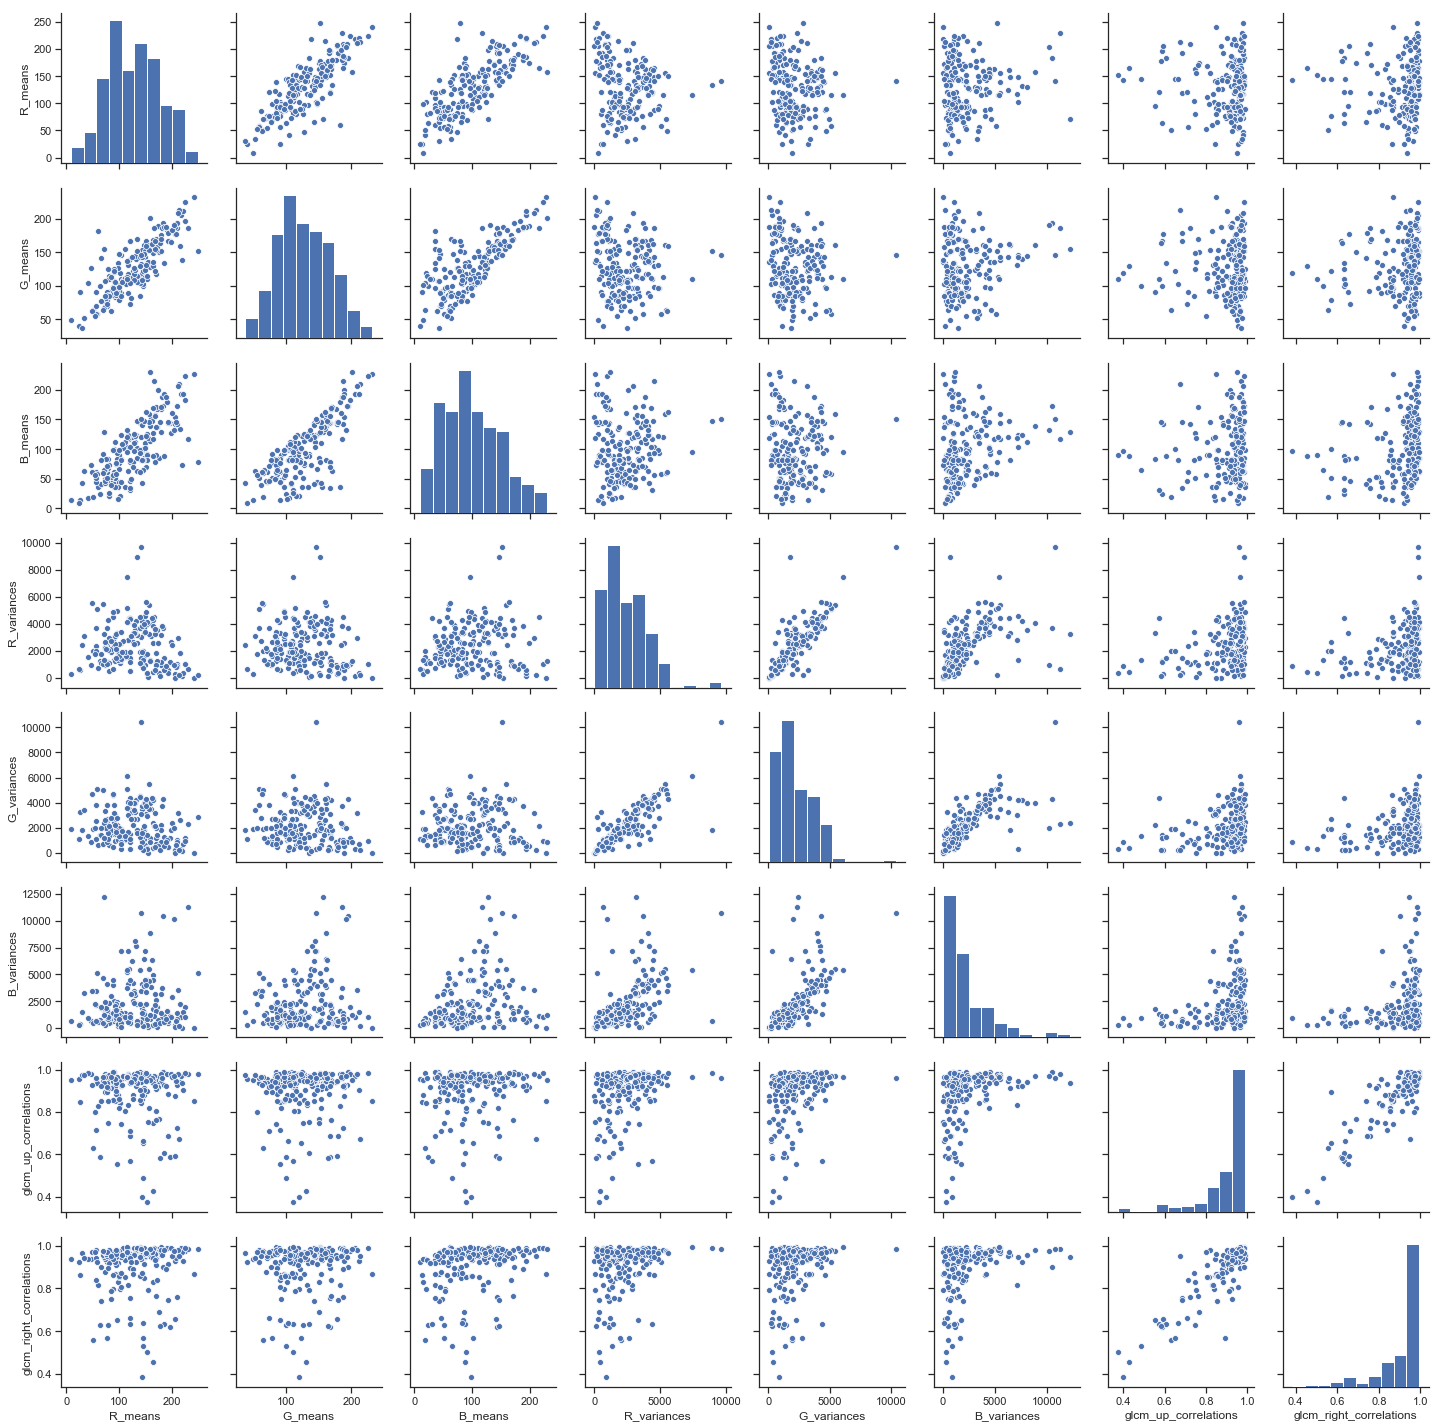

In [54]:
g = sns.pairplot(df)

In [15]:
#appending labels for upcoming classifications
data=np.concatenate((R_means, G_means, B_means, R_variances, G_variances, B_variances, glcm_up_correlations, glcm_right_correlations, labels),axis=1)
df = pd.DataFrame(data=data, columns=["R_means", "G_means", "B_means", "R_variances", "G_variances", "B_variances", "glcm_up_correlations", "glcm_right_correlations", "labels"])

Spearman's correlation coefficient states that highest correlation is between R channel mean and G channel mean, R channel variance and G channel variance and B channel variance and G channel variance. Same can be seen from the pairplot. Green channel variance has negative correlation coefficient with all color channel means and red channel variance has negative correlation with red channel mean and green channel mean.

### PCA

Principal Component Analysis (PCA) is a dimension reduction technique that is used to spot potential clusters. It tries to preserve as much of the original variance of the data as possible but it is sensitive to relative scaling of the original variables and that is why data is usually normalized before performing PCA.

In [56]:
#Reading in data, normalizing data and performing Principal component analysis
X=np.array(df[['R_means', 'G_means', 'B_means', 'R_variances', 'G_variances', 'B_variances', 'glcm_up_correlations', 'glcm_right_correlations']])
scaler=preprocessing.StandardScaler().fit(X)
X_transformed=scaler.transform(X)
pca=PCA(n_components=2).fit(X_transformed) #Extracting two most important variables that explain variance
X_pca=pca.transform(X_transformed) #X_pca includes two normalized principal components

C:\Users\Kalle Henriksson\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Kalle Henriksson\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


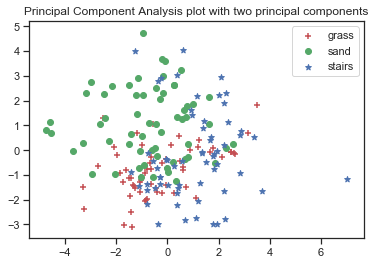

In [58]:
for i in range(0, X_pca.shape[0]):
    if labels[i] == "grass":
        c1 = plt.scatter(X_pca[i,0],X_pca[i,1],c='r', marker='+')
    elif labels[i] == "sand":
        c2 = plt.scatter(X_pca[i,0],X_pca[i,1],c='g', marker='o')
    elif labels[i] == "stairs":
        c3 = plt.scatter(X_pca[i,0],X_pca[i,1],c='b', marker='*')
plt.legend([c1, c2, c3], ['grass', 'sand', 'stairs'])
plt.title('Principal Component Analysis plot with two principal components')
plt.show()

In [59]:
print(pca.explained_variance_ratio_)

[0.36407791 0.32708027]


PCA plot shows that there are no clear clusters, meaning that image classification will be a hard task. Another proof for that is that two first component explain almost equal amount of variance. Even though there are no clear clusters, blessing in disguise is that at least PCA does not show all three picture types in one concentrated cluster.

## Classifiers and performance estimation

### kNN

K-nearest neighbors algorithm(KNN) is a supervised machine learning algorithm that finds the k-nearest neighbors from the training data which are most similar to the data which value is being predicted. Output of KNN is the mean of the values of k-nearest neigbors in regression tasks and most common class of the values of k-nearest neigbors in classification tasks like this one.

C:\Users\Kalle Henriksson\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Kalle Henriksson\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Maximum accuracy with k= 12 : 0.75


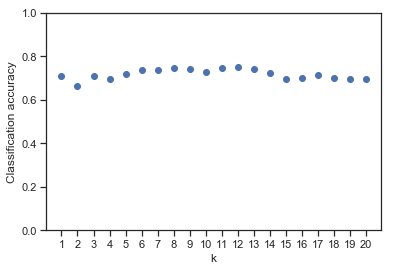

In [48]:
#DAKD 2018 course's model solutions were used as an example
X=np.array(df[['R_means', 'G_means', 'B_means', 'R_variances', 'G_variances', 'B_variances', 'glcm_up_correlations', 'glcm_right_correlations']])
y=np.array(df['labels'])
scaler=preprocessing.StandardScaler().fit(X)
X=scaler.transform(X)
images=y.shape[0]
k_range = range(1,21)
image_range=range(images)
# leave-one-out
loo = LeaveOneOut()
perc=[]

for k in k_range:
    checkfit=[]

    # make the knn search for each train-test-set made by loo.split(X)
    for train_index, test_index in loo.split(X):

        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)

        # check if the predicted image matches with the real one and save the value
        checkfit.append(metrics.accuracy_score(y_test, y_pred))

    perc.append(np.mean(checkfit))

plt.plot(k_range, perc,'o')
plt.ylim((0, 1))
plt.xlabel("k")
plt.ylabel("Classification accuracy")
ticks=k_range
plt.xticks(ticks)

# find the best k-value
k_best=k_range[perc.index(max(perc))]
print("Maximum accuracy with k=",k_best, ":", '%0.2f' %(max(perc)))

In [49]:
#DAKD 2018 course's model solutions were used as an example
X=np.array(df[['R_means', 'G_means', 'B_means', 'R_variances', 'G_variances', 'B_variances', 'glcm_up_correlations', 'glcm_right_correlations']])
y=np.array(df['labels'])
scaler=preprocessing.StandardScaler().fit(X)
X=scaler.transform(X)
k=12
images=y.shape[0]
image_range=range(images)
# leave-one-out
loo = LeaveOneOut()
perc=[]
perc_outer=[]

for image in image_range:
    # divide the data as test and train data for each loo loop
    test_index=[image]
    train_index=np.delete(image_range,image)
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    perc=[]
    checkfit=[]

    # make the knn search for each train-test-set made by loo.split(X)
    for subtrain_index, validation_index in loo.split(X_train):

        X_subtrain, X_validation = X_train[subtrain_index], X_train[validation_index]
        y_subtrain, y_validation = y_train[subtrain_index], y_train[validation_index]

        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_subtrain, y_subtrain)
        y_pred = knn.predict(X_validation)

        # check if the predicted image label matches with the real one and save the value
        checkfit.append(metrics.accuracy_score(y_validation, y_pred))
    perc.append(np.mean(checkfit))
    
performance=np.mean(perc)
print('The estimated accuracy for the method is:', '%0.2f' %(performance))

C:\Users\Kalle Henriksson\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Kalle Henriksson\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


The estimated accuracy for the method is: 0.75


In [50]:
k=12
predicted=[]
# leave-one-out
loo = LeaveOneOut()
    # make the knn search for each train-test-set made by loo.split(X)
for train_index, test_index in loo.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predicted.append(knn.predict(X_test))

    # check if the predicted image label matches with the real one and save the value
accuracy=metrics.accuracy_score(y, predicted)

print('Predicted:',' grass', 'sand', 'stairs')
print('True: grass ', confusion_matrix(y, predicted)[0])
print('True: sand ', confusion_matrix(y, predicted)[1])
print('True: stairs ', confusion_matrix(y, predicted)[2])
print('Accuracy: ', accuracy)

Predicted:  grass sand stairs
True: grass  [47  3 12]
True: sand  [ 2 44 15]
True: stairs  [ 2 12 48]
Accuracy:  0.7513513513513513


I used leave-one-out method since data has only 185 instances. Accuracy is not good enough to consider this as a good classifier. It seems that grass pictures are easiest for classifier, but sand and stairs pictures are much harder for classifying.

### Ridge regression

Ridge regression is a linear regression method which uses a penalty function to insert a tolerable amount of bias to model (hyperplane fit into data) in exchange for lower value of variance. This bias makes Ridge regression perform better than linear regression, which cannot fit hyperplane to dataset in a method that takes into account that different features have different contribution to residual sum of squares. Alpha value inserted to Ridge regression increases models residual sum of squares but lowers the mean square error. Alpha value which minimizes the mean square error gives the best results and should be chosen.

C:\Users\Kalle Henriksson\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Kalle Henriksson\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Maximum accuracy with a= 0.1 : 0.79


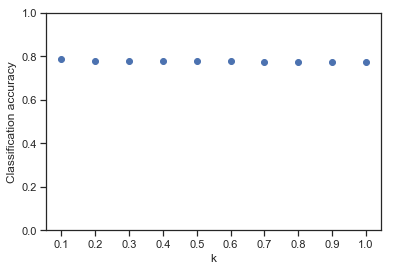

In [52]:
#Same skeleton for code as in KNN
X=np.array(df[['R_means', 'G_means', 'B_means', 'R_variances', 'G_variances', 'B_variances', 'glcm_up_correlations', 'glcm_right_correlations']])
y=np.array(df['labels'])
scaler=preprocessing.StandardScaler().fit(X)
X=scaler.transform(X)
images=y.shape[0]
a_range = np.arange(0.1, 1.1, 0.1)
image_range=range(images)
# leave-one-out
loo = LeaveOneOut()
perc=[]

for a in a_range:
    checkfit=[]

    # make the ridge regression search for each train-test-set made by loo.split(X)
    for train_index, test_index in loo.split(X):

        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        clf = RidgeClassifier(alpha=[a]).fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        # check if the predicted image matches with the real one and save the value
        checkfit.append(metrics.accuracy_score(y_test, y_pred))

    perc.append(np.mean(checkfit))

plt.plot(a_range, perc,'o')
plt.ylim((0, 1))
plt.xlabel("a")
plt.ylabel("Classification accuracy")
ticks=a_range
plt.xticks(ticks)

# find the best a-value
a_best=a_range[perc.index(max(perc))]
print("Maximum accuracy with a=",a_best, ":", '%0.2f' %(max(perc)))

In [57]:
#Same skeleton for code as in KNN
X=np.array(df[['R_means', 'G_means', 'B_means', 'R_variances', 'G_variances', 'B_variances', 'glcm_up_correlations', 'glcm_right_correlations']])
y=np.array(df['labels'])
scaler=preprocessing.StandardScaler().fit(X)
X=scaler.transform(X)
a=0.1
images=y.shape[0]
image_range=range(images)
# leave-one-out
loo = LeaveOneOut()
perc=[]
perc_outer=[]

for image in image_range:
    # divide the data as test and train data for each loo loop
    test_index=[image]
    train_index=np.delete(image_range,image)
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    perc=[]
    checkfit=[]

    # make the ridge regression search for each train-test-set made by loo.split(X)
    for subtrain_index, validation_index in loo.split(X_train):

        X_subtrain, X_validation = X_train[subtrain_index], X_train[validation_index]
        y_subtrain, y_validation = y_train[subtrain_index], y_train[validation_index]

        clf = RidgeClassifier(alpha=[a]).fit(X_subtrain, y_subtrain)
        y_pred = clf.predict(X_validation)

        # check if the predicted image label matches with the real one and save the value
        checkfit.append(metrics.accuracy_score(y_validation, y_pred))
    perc.append(np.mean(checkfit))
    
performance=np.mean(perc)
print('The estimated accuracy for the method is:', '%0.2f' %(performance))

C:\Users\Kalle Henriksson\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Kalle Henriksson\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


The estimated accuracy for the method is: 0.78


In [58]:
a=0.1
predicted=[]
# leave-one-out
loo = LeaveOneOut()
    # make the ridge regression search for each train-test-set made by loo.split(X)
for train_index, test_index in loo.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf = RidgeClassifier(alpha=[a]).fit(X_train, y_train)
    predicted.append(clf.predict(X_test))

    # check if the predicted image label matches with the real one and save the value
accuracy=metrics.accuracy_score(y, predicted)

print('Predicted:',' grass', 'sand', 'stairs')
print('True: grass ', confusion_matrix(y, predicted)[0])
print('True: sand ', confusion_matrix(y, predicted)[1])
print('True: stairs ', confusion_matrix(y, predicted)[2])
print('Accuracy: ', accuracy)

Predicted:  grass sand stairs
True: grass  [50  4  8]
True: sand  [ 0 50 11]
True: stairs  [ 3 13 46]
Accuracy:  0.7891891891891892


Confusion matrix and accuracy score tell that Ridge regression classifies images better than KNN algorithm, even though accuracy could still be better. Ridge regression works well with grass images but has problems with sand and stairs images.

 ### Multi-layer perceptron

Multi-layer perceptron belongs to the class of feedforward artificial neural networks. It consists of at least three layers of nodes: an input layer, a hidden layer and an output layer. Except for the input layers nodes, each node is a neuron that uses a nonlinear activation function for mapping weighted inputs to output.

C:\Users\Kalle Henriksson\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Kalle Henriksson\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Maximum accuracy with number of neurons= 46 : 0.53


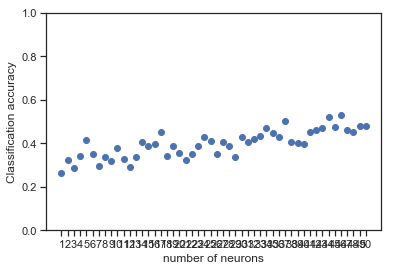

In [64]:
#Same skeleton for code as in KNN
X=np.array(df[['R_means', 'G_means', 'B_means', 'R_variances', 'G_variances', 'B_variances', 'glcm_up_correlations', 'glcm_right_correlations']])
y=np.array(df['labels'])
scaler=preprocessing.StandardScaler().fit(X)
X=scaler.transform(X)
images=y.shape[0]
i_range = range(1,51)
image_range=range(images)
# leave-one-out
loo = LeaveOneOut()
perc=[]

for i in i_range:
    checkfit=[]

    # make the mlp search for each train-test-set made by loo.split(X)
    for train_index, test_index in loo.split(X):

        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        clf = MLPClassifier(solver='adam', activation='relu', early_stopping=True, hidden_layer_sizes=(i,))
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        # check if the predicted image matches with the real one and save the value
        checkfit.append(metrics.accuracy_score(y_test, y_pred))

    perc.append(np.mean(checkfit))

plt.plot(i_range, perc,'o')
plt.ylim((0, 1))
plt.xlabel("number of neurons")
plt.ylabel("Classification accuracy")
ticks=i_range
plt.xticks(ticks)

# find the best number of neurons
i_best=i_range[perc.index(max(perc))]
print("Maximum accuracy with number of neurons=",i_best, ":", '%0.2f' %(max(perc)))

In [16]:
#Same skeleton for code as in KNN
X=np.array(df[['R_means', 'G_means', 'B_means', 'R_variances', 'G_variances', 'B_variances', 'glcm_up_correlations', 'glcm_right_correlations']])
y=np.array(df['labels'])
scaler=preprocessing.StandardScaler().fit(X)
X=scaler.transform(X)
i=46
images=y.shape[0]
image_range=range(images)
# leave-one-out
loo = LeaveOneOut()
perc=[]
perc_outer=[]

for image in image_range:
    # divide the data as test and train data for each loo loop
    test_index=[image]
    train_index=np.delete(image_range,image)
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    perc=[]
    checkfit=[]

    # make the mlp search for each train-test-set made by loo.split(X)
    for subtrain_index, validation_index in loo.split(X_train):

        X_subtrain, X_validation = X_train[subtrain_index], X_train[validation_index]
        y_subtrain, y_validation = y_train[subtrain_index], y_train[validation_index]

        clf = MLPClassifier(solver='adam', activation='relu', early_stopping=True, hidden_layer_sizes=(i,))
        clf.fit(X_subtrain, y_subtrain)
        y_pred = clf.predict(X_validation)

        # check if the predicted image label matches with the real one and save the value
        checkfit.append(metrics.accuracy_score(y_validation, y_pred))
    perc.append(np.mean(checkfit))
    print(image) #long calculation time, printing index to follow where algorithm is going
performance=np.mean(perc)
print('The estimated accuracy for the method is:', '%0.2f' %(performance))

C:\Users\Kalle Henriksson\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Kalle Henriksson\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
The estimated accuracy for the method is: 0.49


In [17]:
i=46
predicted=[]
# leave-one-out
loo = LeaveOneOut()
    # make the ridge regression search for each train-test-set made by loo.split(X)
for train_index, test_index in loo.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf = MLPClassifier(solver='adam', activation='relu', early_stopping=True, hidden_layer_sizes=(i,))
    clf.fit(X_train, y_train)
    predicted.append(clf.predict(X_test))

    # check if the predicted image label matches with the real one and save the value
accuracy=metrics.accuracy_score(y, predicted)

print('Predicted:',' grass', 'sand', 'stairs')
print('True: grass ', confusion_matrix(y, predicted)[0])
print('True: sand ', confusion_matrix(y, predicted)[1])
print('True: stairs ', confusion_matrix(y, predicted)[2])
print('Accuracy: ', accuracy)

Predicted:  grass sand stairs
True: grass  [27 13 22]
True: sand  [20 23 18]
True: stairs  [10 26 26]
Accuracy:  0.41081081081081083


MLP seems to be the least accurate of the three methods. Cause of this might be that number of samples is so small that neurons are not able to optimize themselves.

## Discussion

Ridge regression performs better than KNN and MLP. My hypothesis for that is that since features make the data scattered around without clear clusters, KNN is prone to make mistakes as Ridge regression fits a hyperplane to dataspace and therefore is not that prone to make mistakes with scattered data and there is not enough data to optimize MLP.

Scattered data gives limitations to Ridge regression and KNN algorithms, Ridge would perform better if features would put data more linearly and KNN would perform better if features would cluster data more effectively. I'm thinking that results could be improved by using more pixels in images so that differences between features would be clearer but that would also increase the calculation times in data preparation. And of course with the obvious answer, by having more images in the dataset.